# Temperature Forecasting

# Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



# Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9.LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# This is a regression problem as the next day min and max temperature are having continuous value.

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [212]:
data=pd.read_csv('temperature_forecast.csv')

In [213]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [214]:
df=pd.DataFrame(data)

In [215]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


There are in total 7752 records and 25 features.
The target(output) variable is Next_Tmax and Next_Tmin.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All the datatype are having float category except date feature which is having object datatype.
There are null values in the features which needs to be treated.

In [217]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

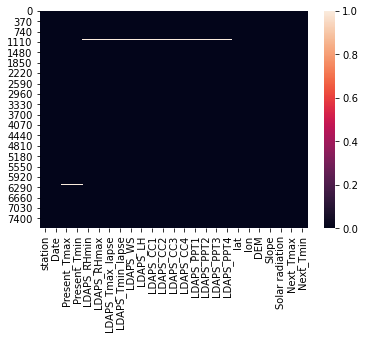

In [218]:
sns.heatmap(df.isnull())

There are null values in the dataset can be confirmed from the heatmap.

In [219]:
df1=df.copy()

In [220]:
df1.dropna(inplace=True)

I have dropped all Nan values from the dataset.

Total loss of data after dropping nan values is approx 2%.

In [221]:
loss_of_data=((7752-7588)/7752)*100

In [222]:
loss_of_data

2.1155830753353975

In [223]:
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [224]:
df1['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

There are in total 25 weather stations.

In [225]:
df1['station'].value_counts()

25.0    307
18.0    307
2.0     307
17.0    307
10.0    307
23.0    307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
22.0    302
9.0     302
24.0    302
19.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

The weather station 5 is having less records in this dataset as compared to other records.


In [226]:
df1['day']=pd.to_datetime(df1['Date']).dt.day
df1['month']=pd.to_datetime(df1['Date']).dt.month
df1['year']=pd.to_datetime(df1['Date']).dt.year

In [227]:
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [228]:
df1.drop('Date',axis=1,inplace=True)

I have dropped Date feature from the dataset after extracting out the day, month and year.

In [229]:
df1['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [230]:
df1['month'].unique()

array([ 6,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12], dtype=int64)

The data is taken for the year 2013 to 2017 for all the 12 months.

In [231]:
df1['year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: year, dtype: int64

The highest records are available for 2014 year and 2016 is having less no of records available.

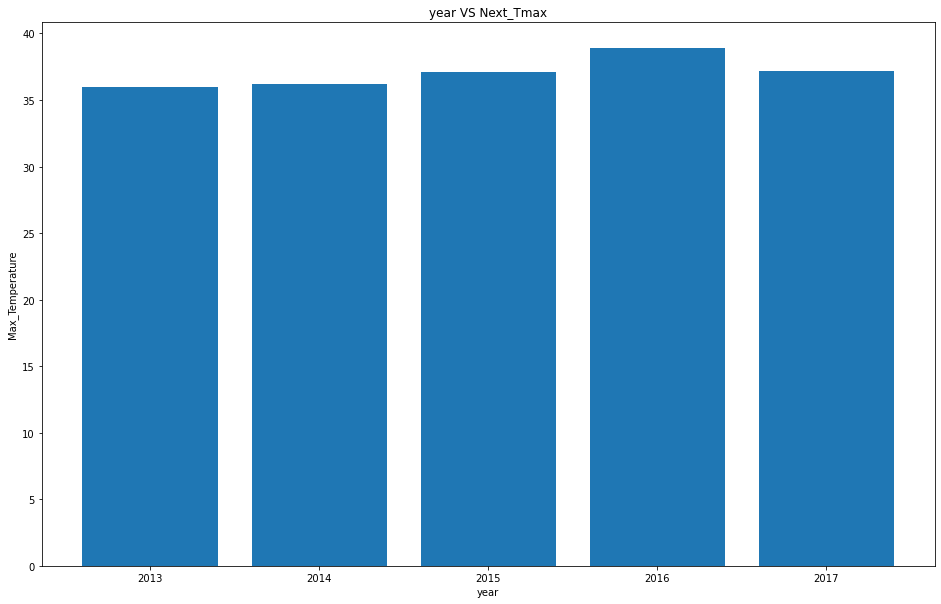

In [232]:
plt.figure(figsize=[16,10])
plt.bar(df1['year'],df1['Next_Tmax'])
plt.xlabel('year')
plt.ylabel('Max_Temperature')
plt.title("year VS Next_Tmax")
plt.show()

In [233]:
pd.crosstab(df1['year'],df1['Next_Tmax'],margins=True)

Next_Tmax,17.4,18.6,18.9,19.5,19.7,20.1,20.3,20.4,20.5,20.6,...,37.1,37.2,37.4,37.5,37.6,37.8,38.3,38.7,38.9,All
year,,,,,,,,,,,,,,,,,,,,,
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1510
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1547
2015,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1533
2016,1,1,1,1,1,1,3,1,1,1,...,5,2,1,1,1,3,1,1,1,1492
2017,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1506
All,1,1,1,1,1,1,3,2,1,1,...,6,3,1,1,1,3,1,1,1,7588


From the above plot it can be said that year 2016 has recorded the highest i.e max temperature of 38.9.

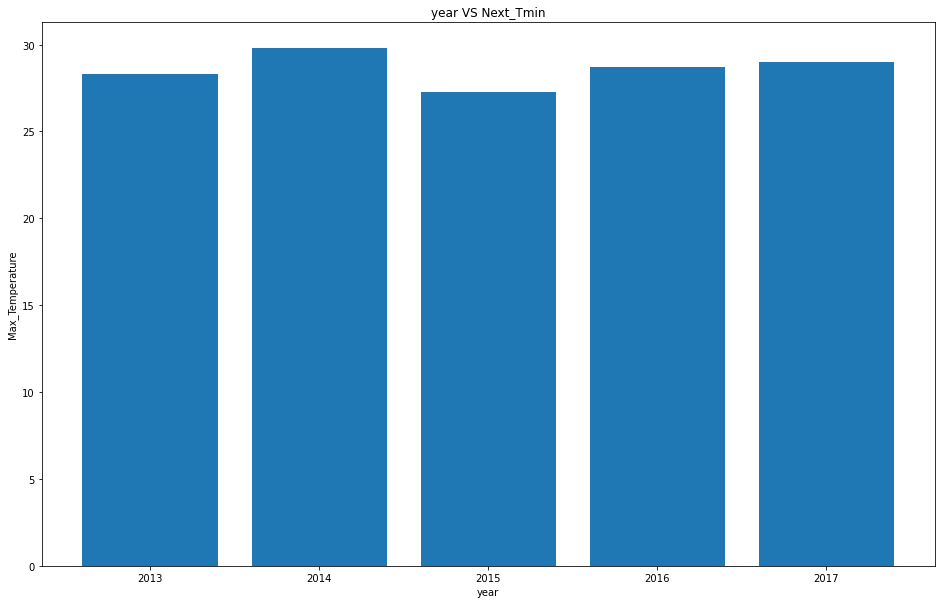

In [234]:
plt.figure(figsize=[16,10])
plt.bar(df1['year'],df1['Next_Tmin'])
plt.xlabel('year')
plt.ylabel('Max_Temperature')
plt.title("year VS Next_Tmin")
plt.show()

In [235]:
pd.crosstab(df1['year'],df1['Next_Tmin'],margins=True)

Next_Tmin,11.3,12.9,13.3,13.4,13.6,13.8,13.9,14.1,14.3,14.4,...,28.5,28.6,28.7,28.8,29.0,29.1,29.4,29.5,29.8,All
year,,,,,,,,,,,,,,,,,,,,,
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1510
2014,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1547
2015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1533
2016,1,0,1,1,0,1,0,2,0,1,...,0,2,2,0,0,0,0,0,0,1492
2017,0,1,0,0,1,0,1,1,1,1,...,0,0,0,1,1,0,0,0,0,1506
All,1,1,1,1,1,2,1,3,1,2,...,1,3,2,2,1,1,1,1,1,7588


The year 2016 has recorded the lowest i.e minimum temperature of 11.3.

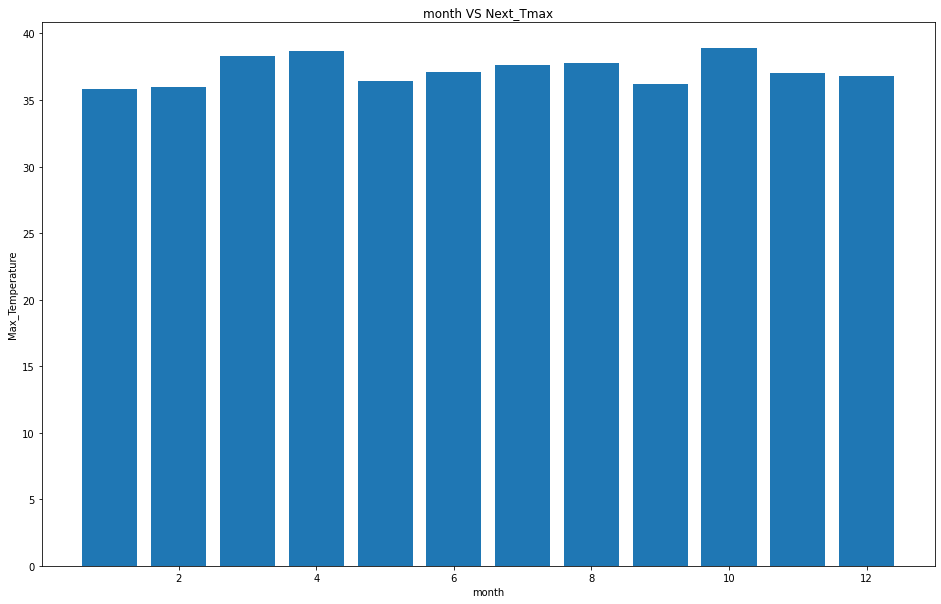

In [236]:
plt.figure(figsize=[16,10])
plt.bar(df1['month'],df1['Next_Tmax'])
plt.xlabel('month')
plt.ylabel('Max_Temperature')
plt.title("month VS Next_Tmax")
plt.show()

In [237]:
pd.crosstab(df1['month'],df1['Next_Tmax'],margins=True)

Next_Tmax,17.4,18.6,18.9,19.5,19.7,20.1,20.3,20.4,20.5,20.6,...,37.1,37.2,37.4,37.5,37.6,37.8,38.3,38.7,38.9,All
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,249
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,246
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,247
4,0,0,0,0,0,0,0,0,0,0,...,0,3,1,1,0,0,0,1,0,248
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,246
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,360
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2584
8,1,1,1,1,1,1,3,2,1,1,...,0,0,0,0,0,2,0,0,0,2446
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,247


The October month has recorded the highest temperature i.e 38.9

In [238]:
pd.crosstab(df1['month'],df1['Next_Tmin'],margins=True)

Next_Tmin,11.3,12.9,13.3,13.4,13.6,13.8,13.9,14.1,14.3,14.4,...,28.5,28.6,28.7,28.8,29.0,29.1,29.4,29.5,29.8,All
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,1,1,1,249
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,246
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,247
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,248
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,246
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2584
8,1,1,1,1,1,1,1,3,1,2,...,0,2,1,0,0,0,0,0,0,2446
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,247


The August month has recorded the lowest temperature i.e 11.3

(array([  16.,  158.,  437.,  840., 1241., 1714., 1598., 1110.,  422.,
          52.]),
 array([20.  , 21.76, 23.52, 25.28, 27.04, 28.8 , 30.56, 32.32, 34.08,
        35.84, 37.6 ]),
 <BarContainer object of 10 artists>)

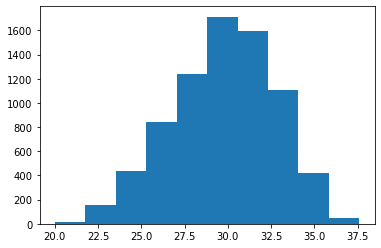

In [239]:
plt.hist(df1['Present_Tmax'])

Most of the records pertaining to present_tmax lies in the range of 22.5 to 31.5°C.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

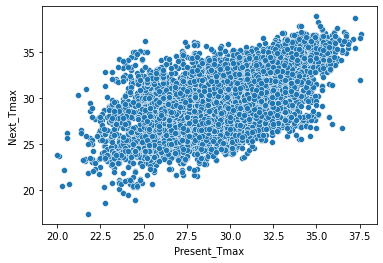

In [240]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df1)

There is a positive linear relationship between present day maximum air temperature and next day max air temperature.
As the present day maximum air temperature increases the maximum air temperature of next day also increases.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

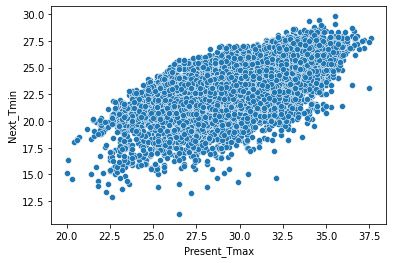

In [241]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmin',data=df1)

There is a positive linear relationship between present day maximum air temperature and next day min air temperature.
As the present day maximum air temperature increases the minimum air temperature of next day also increases.


(array([1.000e+00, 1.100e+01, 5.800e+01, 2.320e+02, 7.490e+02, 1.611e+03,
        2.513e+03, 1.559e+03, 8.000e+02, 5.400e+01]),
 array([11.3 , 13.16, 15.02, 16.88, 18.74, 20.6 , 22.46, 24.32, 26.18,
        28.04, 29.9 ]),
 <BarContainer object of 10 artists>)

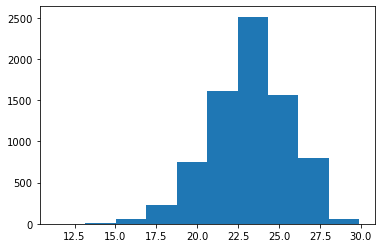

In [242]:
plt.hist(df1['Present_Tmin'])

Most of the records pertaining to present_tmin lies in the range of 17.5 to 23.5°C.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

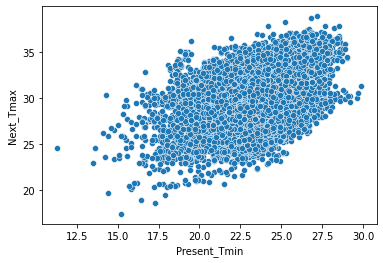

In [243]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmax',data=df1)

There is a positive linear relationship between present day minimum air temperature and next day maximum air temperature.
As the present day minimum air temperature increases the maximum  air temperature of next day also increases.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

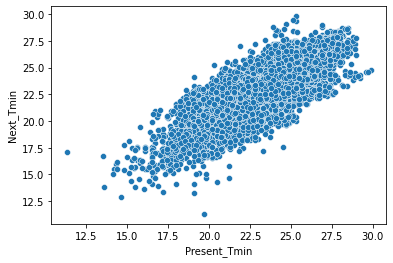

In [244]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df1)

There is a positive linear relationship between present day minimum air temperature and next day minimum air temperature.
As the present day minimum air temperature increases the minimum air temperature of next day also increases.

(array([  57.,  393.,  986., 1566., 1564., 1118.,  892.,  635.,  301.,
          76.]),
 array([19.79466629, 27.66767311, 35.54067993, 43.41368675, 51.28669357,
        59.1597004 , 67.03270722, 74.90571404, 82.77872086, 90.65172768,
        98.5247345 ]),
 <BarContainer object of 10 artists>)

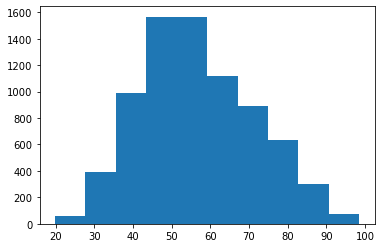

In [245]:
plt.hist(df1['LDAPS_RHmin'])

In [246]:
df1['LDAPS_RHmin'].min()

19.79466629

In [247]:
df1['LDAPS_RHmin'].max()

98.5247345

 The LDAPS model forecast of next-day minimum relative humidity (%) is having minimum humidity of 19.7% and maximum humidity of 98.52%.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

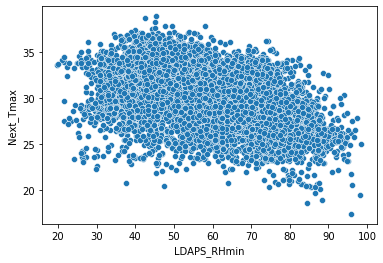

In [248]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmax',data=df1)

There is a negative linear relationship between the next-day maximum air temperature and next day minimum relative humidity.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

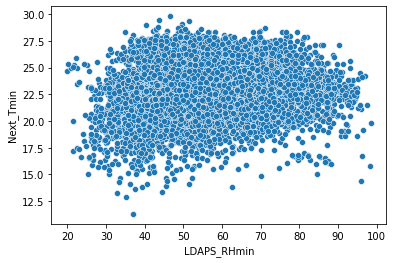

In [249]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df1)

There is a positive linear relationship between the next-day minimum air temperature and next day minimum relative humidity.

(array([   9.,   47.,  133.,  280.,  507.,  772., 1180., 1786., 1967.,
         907.]),
 array([ 58.93628311,  63.04267006,  67.14905701,  71.25544396,
         75.36183091,  79.46821785,  83.5746048 ,  87.68099175,
         91.7873787 ,  95.89376565, 100.0001526 ]),
 <BarContainer object of 10 artists>)

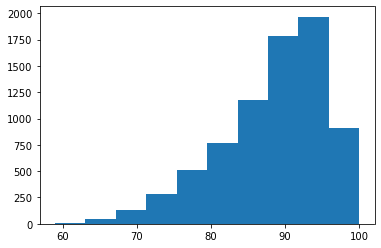

In [250]:
plt.hist(df1['LDAPS_RHmax'])

 Most of the records for next-day maximum relative humidity(%)lies in the range of 70 to 90 %.

In [251]:
df1['LDAPS_RHmax'].min()

58.93628311

In [252]:
df1['LDAPS_RHmax'].max()

100.00015259999999

 The LDAPS model forecast of next-day maximum relative humidity (%) is having min humidity of 59% and maximum humidity of 100%.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

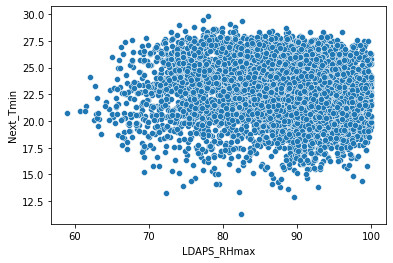

In [253]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmin',data=df1)

As such there is no relationship between next-day maximum relative humidity and next day mimimun air temperature.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

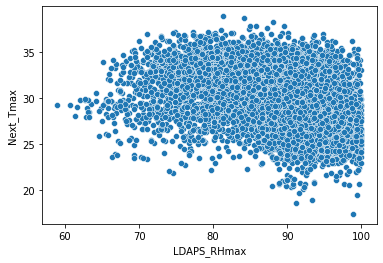

In [254]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df1)

As such there is no relationship between next-day maximum relative humidity and next day maximum air temperature.

(array([   9.,   39.,  186.,  607., 1421., 2000., 1912., 1046.,  351.,
          17.]),
 array([17.62495378, 19.71668392, 21.80841407, 23.90014421, 25.99187436,
        28.0836045 , 30.17533464, 32.26706479, 34.35879493, 36.45052508,
        38.54225522]),
 <BarContainer object of 10 artists>)

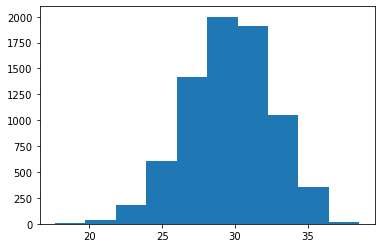

In [255]:
plt.hist(df1['LDAPS_Tmax_lapse'])

In [256]:
df1['LDAPS_Tmax_lapse'].min()   

17.62495378

In [257]:
df1['LDAPS_Tmax_lapse'].max()

38.54225522

Most of the records for next-day maximum air temperature applied lapse rate (°C) lies in the range of 25 to 32°C with a minimum value i.e 17°C and maximum value i.e 38.5°C.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

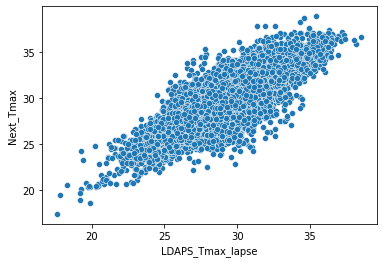

In [258]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df1)

There is a positive linear relationship between next-day maximum air temperature applied lapse rate (°C) and the next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

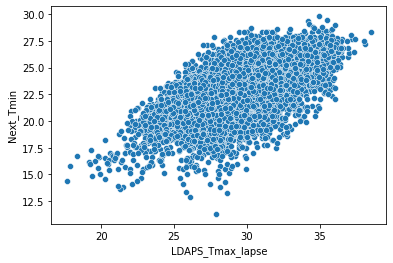

In [259]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df1)

There is a positive linear relationship between next-day maximum air temperature applied lapse rate (°C) and the next day minimum air temperature.

(array([  26.,  101.,  151.,  449., 1046., 1644., 2110., 1437.,  572.,
          52.]),
 array([14.27264631, 15.80731592, 17.34198554, 18.87665515, 20.41132476,
        21.94599438, 23.48066399, 25.0153336 , 26.55000321, 28.08467283,
        29.61934244]),
 <BarContainer object of 10 artists>)

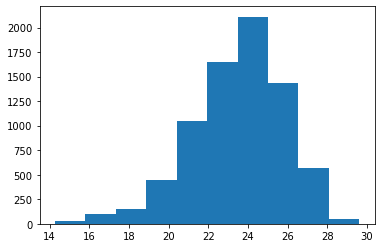

In [260]:
plt.hist(df1['LDAPS_Tmin_lapse'])

In [261]:
df1['LDAPS_Tmin_lapse'].min()

14.27264631

In [262]:
df1['LDAPS_Tmin_lapse'].max()

29.61934244

Most of the records for next-day maximum air temperature applied lapse rate (°C) lies in the range of 18 to 24°C with a minimum value i.e 14°C and maximum value i.e 29.6°C.

(array([5.960e+02, 3.443e+03, 2.102e+03, 8.630e+02, 3.370e+02, 1.600e+02,
        4.900e+01, 3.100e+01, 3.000e+00, 4.000e+00]),
 array([ 2.88257962,  4.78008376,  6.6775879 ,  8.57509203, 10.47259617,
        12.37010031, 14.26760444, 16.16510858, 18.06261272, 19.96011685,
        21.85762099]),
 <BarContainer object of 10 artists>)

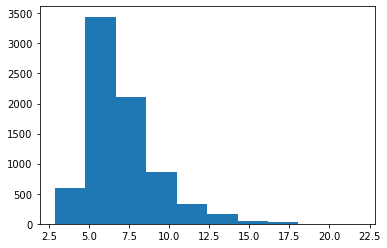

In [263]:
plt.hist(df1['LDAPS_WS'])

In [264]:
df1['LDAPS_WS'].min()

2.882579625

In [265]:
df1['LDAPS_WS'].max()

21.85762099

Most of the records for next-day average wind speed (m/s) lies in the range of 2.8 to 6 m/s with a minimun value as 2.88 m/s and maximum values as 21.85 m/s.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

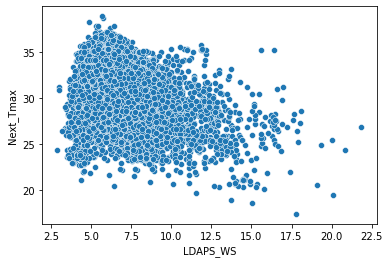

In [266]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmax',data=df1)

There is a negative linear relationship between next-day average wind speed (m/s) and the next-day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

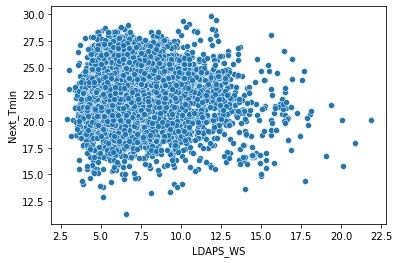

In [267]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmin',data=df1)

There is a negative linear relationship between next-day average wind speed (m/s) and the next-day minimum air temperature.

In [268]:
df1['LDAPS_WS'].unique()

array([6.81888697, 5.69188993, 6.13822368, ..., 6.14891751, 6.542819  ,
       7.28926362])

In [269]:
df1['LDAPS_WS'].value_counts()

4.633030     1
6.842240     1
6.796009     1
10.157699    1
7.892052     1
            ..
8.867639     1
4.513049     1
11.098644    1
8.118150     1
8.112974     1
Name: LDAPS_WS, Length: 7588, dtype: int64

In [270]:
df1['LDAPS_LH'].unique()

array([69.45180527, 51.93744783, 20.57304966, ..., 72.05829446,
       47.24145703,  9.09003441])

In [271]:
df1['LDAPS_LH'].value_counts()

31.292903    1
52.898936    1
18.794811    1
58.594891    1
35.230479    1
            ..
61.306949    1
99.205233    1
10.853051    1
20.780082    1
48.865865    1
Name: LDAPS_LH, Length: 7588, dtype: int64

In [272]:
df1['LDAPS_LH'].min()

-13.60321209

In [273]:
df1['LDAPS_LH'].max()

213.4140062

(array([  42., 1398., 2107., 1706., 1225.,  673.,  310.,  107.,   16.,
           4.]),
 array([-13.60321209,   9.09850974,  31.80023157,  54.5019534 ,
         77.20367523,  99.90539706, 122.60711888, 145.30884071,
        168.01056254, 190.71228437, 213.4140062 ]),
 <BarContainer object of 10 artists>)

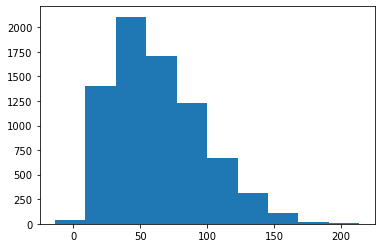

In [274]:
plt.hist(df1['LDAPS_LH'])

In [275]:
df1['LDAPS_LH'].min()

-13.60321209

In [276]:
df1['LDAPS_LH'].max()

213.4140062

Most of the records next-day average latent heat flux lies in the range of 10 to 60 W/m2 with a minimum value i.e -13 and maximum value i.e 213.41.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

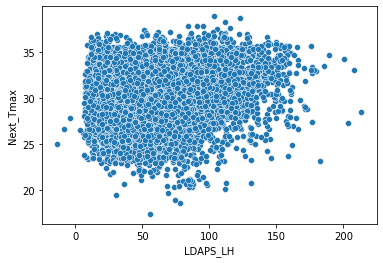

In [277]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmax',data=df1)

There is a positive linear relationship between next-day average latent heat flux and the next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

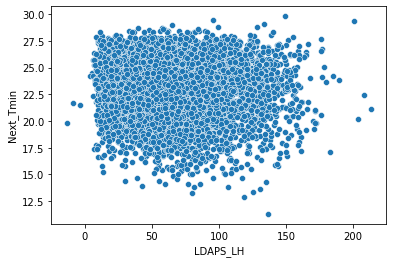

In [278]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmin',data=df1)

As such there is no relationship between next-day average latent heat flux and the next day minimim air temperature.

In [279]:
df1['LDAPS_CC1'].unique()

array([0.23394747, 0.2255082 , 0.20934366, ..., 0.03003418, 0.03587383,
       0.04895354])

In [280]:
df1['LDAPS_CC1'].value_counts()

0.000000    104
0.211694      1
0.081400      1
0.130883      1
0.271888      1
           ... 
0.746881      1
0.332259      1
0.917315      1
0.034681      1
0.230776      1
Name: LDAPS_CC1, Length: 7485, dtype: int64

There are 104 records with next-day average latent heat flux as zero.

(array([1400.,  934., 1165.,  939.,  761.,  521.,  542.,  553.,  526.,
         247.]),
 array([0.        , 0.09672773, 0.19345547, 0.2901832 , 0.38691093,
        0.48363866, 0.5803664 , 0.67709413, 0.77382186, 0.8705496 ,
        0.96727733]),
 <BarContainer object of 10 artists>)

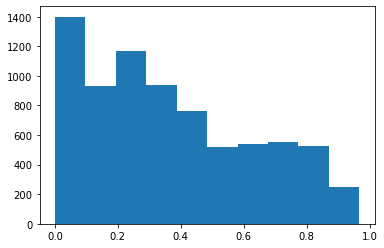

In [281]:
plt.hist(df1['LDAPS_CC1'])

In [282]:
df1['LDAPS_CC1'].min()

0.0

In [283]:
df1['LDAPS_CC1'].max()

0.967277328

The records in LDAPS_CC1 are unevenly distributed with most of the records lying in the range of 0.0 to 0.3 and from 0.5 to 0.8  with minimum value as zero and maximum values as 0.96. 

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

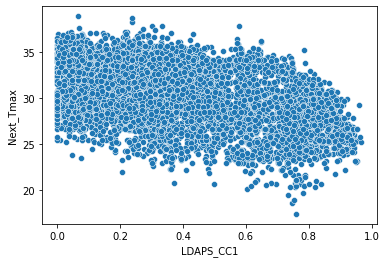

In [284]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df1)

There is a negative linear relationship between next-day 1st 6-hour split average cloud cover (0-5 h) and next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

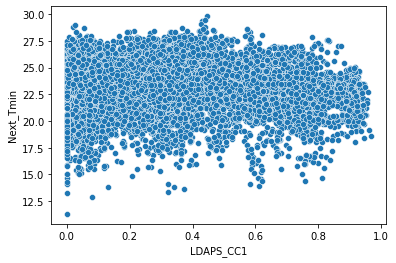

In [285]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df1)

There is a positive linear relationship between next-day 1st 6-hour split average cloud cover (0-5 h) and next day minimum air temperature.

In [286]:
df1['LDAPS_CC2'].unique()

array([0.20389571, 0.25177137, 0.25746945, ..., 0.08103502, 0.07496236,
       0.0598686 ])

In [287]:
df1['LDAPS_CC2'].value_counts()

0.000000    93
0.065887     1
0.887668     1
0.808160     1
0.621571     1
            ..
0.215138     1
0.140863     1
0.079483     1
0.103516     1
0.336139     1
Name: LDAPS_CC2, Length: 7496, dtype: int64

(array([1427., 1119., 1017., 1011.,  672.,  582.,  652.,  456.,  452.,
         200.]),
 array([0.        , 0.09683531, 0.19367061, 0.29050592, 0.38734122,
        0.48417653, 0.58101184, 0.67784714, 0.77468245, 0.87151775,
        0.96835306]),
 <BarContainer object of 10 artists>)

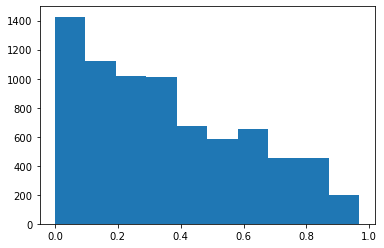

In [288]:
plt.hist(df1['LDAPS_CC2'])

In [289]:
df1['LDAPS_CC2'].min()

0.0

In [290]:
df1['LDAPS_CC2'].max()

0.96835306

The records in LDAPS_CC2 are unevenly distributed with minimum value as zero and max values as 0.96. 

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

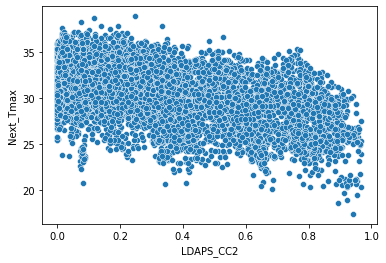

In [291]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df1)

There is a negative linear relationship between  next-day 2nd 6-hour split average cloud cover (6-11 h) and next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

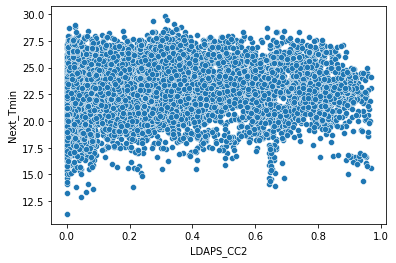

In [292]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df1)

There is a positive linear relationship between next-day 2nd 6-hour split average cloud cover (6-11 h) and next day minimum air temperature.

In [293]:
df1['LDAPS_CC3'].unique()

array([1.61696854e-01, 1.59444059e-01, 2.04091465e-01, ...,
       2.37000000e-05, 7.86000000e-05, 5.85000000e-07])

In [294]:
df1['LDAPS_CC3'].value_counts()

0.000000e+00    75
8.680560e-04     2
5.810000e-07     2
4.416774e-01     1
7.714030e-01     1
                ..
5.022028e-01     1
8.237407e-02     1
6.881582e-01     1
2.444761e-01     1
1.695957e-02     1
Name: LDAPS_CC3, Length: 7512, dtype: int64

(array([1858., 1204., 1096.,  839.,  665.,  586.,  496.,  470.,  248.,
         126.]),
 array([0.        , 0.09837888, 0.19675775, 0.29513663, 0.3935155 ,
        0.49189438, 0.59027325, 0.68865213, 0.787031  , 0.88540988,
        0.98378875]),
 <BarContainer object of 10 artists>)

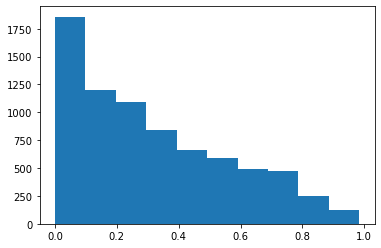

In [295]:
plt.hist(df1['LDAPS_CC3'])

In [296]:
df1['LDAPS_CC3'].min()

0.0

In [297]:
df1['LDAPS_CC3'].max()

0.983788755

Most of the records are lying in the range of 0.0 to 0.2 with minimum value as 0 and maximum values as 0.98.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

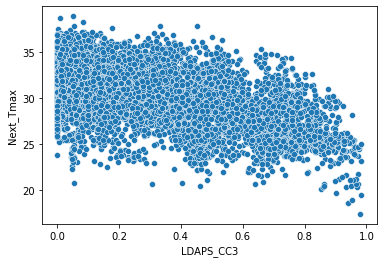

In [298]:
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df1)

There is a negative linear relationship between  next-day 3rd 6-hour split average cloud cover (12-17 h) and next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

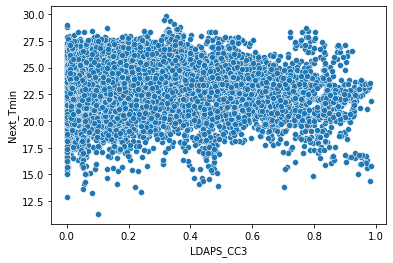

In [299]:
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df1)

There is a positive linear relationship between next-day 3rd 6-hour split average cloud cover (12-17 h) and next day minimum air temperature.

(array([2189., 1299.,  844.,  716.,  581.,  614.,  613.,  371.,  231.,
         130.]),
 array([0.        , 0.09747095, 0.1949419 , 0.29241286, 0.38988381,
        0.48735476, 0.58482571, 0.68229667, 0.77976762, 0.87723857,
        0.97470952]),
 <BarContainer object of 10 artists>)

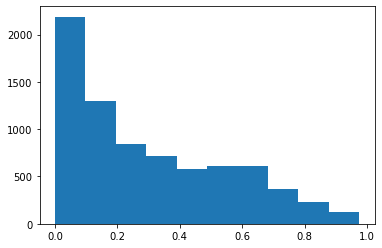

In [300]:
plt.hist(df1['LDAPS_CC4'])

In [301]:
df1['LDAPS_CC4'].min()

0.0

In [302]:
df1['LDAPS_CC4'].max()

0.9747095240000001

In [303]:
df1['LDAPS_CC4'].unique()

array([0.1309282 , 0.12772726, 0.14212525, ..., 0.00437995, 0.01767779,
       0.00079615])

In [304]:
df1['LDAPS_CC4'].value_counts()

0.000000    135
0.002604      7
0.001736      3
0.005208      3
0.000001      2
           ... 
0.096646      1
0.583172      1
0.707523      1
0.135756      1
0.074535      1
Name: LDAPS_CC4, Length: 7438, dtype: int64

Most of the records are lying in the range of 0.0 to 0.2 having minimum value as 0.0 and maximum value as 0.974.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

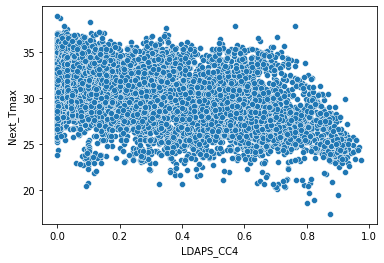

In [305]:
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df1)

There is a negative linear relationship between  next-day 4th 6-hour split average cloud cover (18-23 h) and next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

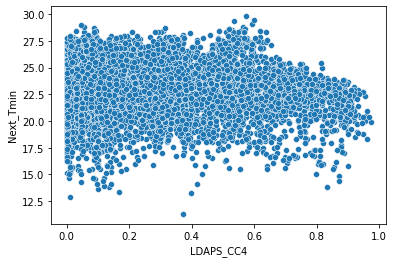

In [306]:
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df1)

There is a negative linear relationship between  next-day 4th 6-hour split average cloud cover (18-23 h) and next day minimum  air temperature.

In [307]:
df1['LDAPS_PPT1'].unique()

array([0.        , 0.80422247, 0.46474446, ..., 3.45615864, 2.20858192,
       2.04050223])

In [308]:
 df1['LDAPS_PPT1'].value_counts()

0.000000    4789
0.001953      11
0.002604       5
0.001734       3
0.002199       2
            ... 
0.020203       1
0.002677       1
0.935344       1
6.001337       1
0.163309       1
Name: LDAPS_PPT1, Length: 2779, dtype: int64

There are 4789 records having 0 for next-day 1st 6-hour split average precipitation (0-5 h).

(array([7.01e+03, 2.99e+02, 1.20e+02, 6.40e+01, 5.10e+01, 1.90e+01,
        9.00e+00, 1.00e+01, 3.00e+00, 3.00e+00]),
 array([ 0.        ,  2.37015441,  4.74030882,  7.11046322,  9.48061763,
        11.85077204, 14.22092645, 16.59108086, 18.96123526, 21.33138967,
        23.70154408]),
 <BarContainer object of 10 artists>)

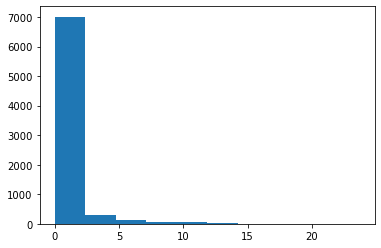

In [309]:
plt.hist(df1['LDAPS_PPT1'])

In [310]:
df1['LDAPS_PPT1'].min()

0.0

In [311]:
df1['LDAPS_PPT1'].max()

23.70154408

Most of the records are lying in the range of 0 to 3 having minimum value as 0 and maximum values as 23.70

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

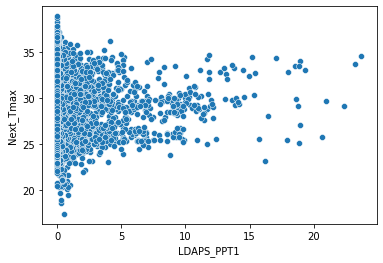

In [312]:
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmax',data=df1)

There is a very less negative linear relationship beween next-day 1st 6-hour split average precipitation (0-5 h) and next-day maximum air temperature.


<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

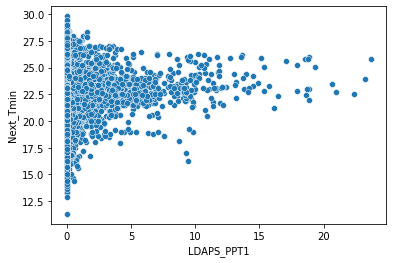

In [313]:
sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmin',data=df1)

There is a very less linear relationship beween next-day 1st 6-hour split average precipitation (0-5 h) and next-day minimum air temperature.


In [314]:
df1['LDAPS_PPT2'].unique()

array([ 0.        ,  9.93311109, 11.83342134, ...,  0.29865928,
        0.30087843,  0.24799708])

In [315]:
df1['LDAPS_PPT2'].value_counts()

0.000000    5094
0.001953       7
0.000781       3
0.000040       3
0.000014       2
            ... 
0.085236       1
0.041993       1
0.002633       1
0.039292       1
4.211753       1
Name: LDAPS_PPT2, Length: 2479, dtype: int64

There are 5094 records having 0 for next day 2nd hour average precipitation (6-11 h).

(array([7.075e+03, 2.080e+02, 1.520e+02, 7.200e+01, 4.100e+01, 1.300e+01,
        7.000e+00, 9.000e+00, 4.000e+00, 7.000e+00]),
 array([ 0.        ,  2.16216608,  4.32433216,  6.48649823,  8.64866431,
        10.81083039, 12.97299647, 15.13516255, 17.29732862, 19.4594947 ,
        21.62166078]),
 <BarContainer object of 10 artists>)

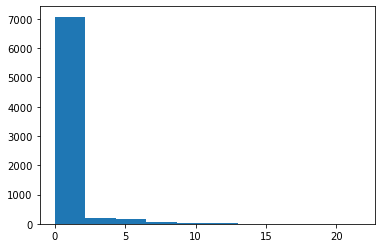

In [316]:
plt.hist(df1['LDAPS_PPT2'])

In [317]:
df1['LDAPS_PPT2'].min()

0.0

In [318]:
df1['LDAPS_PPT2'].max()

21.62166078

Most of the records are lying in the range of 0 to 3 having minimum value as 0 and maximum values as 21.62

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

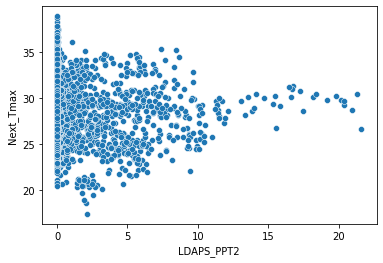

In [319]:
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',data=df1)

There is a very less negative linear relationship beween next-day 2nd 6-hour split average precipitation (6-11 h) and next-day maximum air temperature.


<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

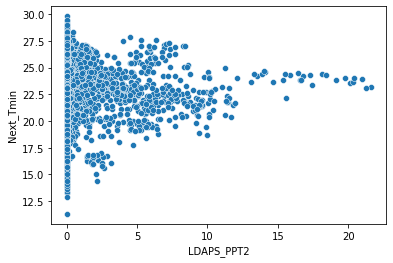

In [320]:
sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmin',data=df1)

There is a very less negative linear relationship beween next-day 2nd 6-hour split average precipitation (6-11 h) and next-day minimum air temperature.

In [321]:
df1['LDAPS_PPT3'].unique()

array([0.        , 0.23700432, 0.25371913, ..., 0.09810387, 0.02972079,
       0.02102984])

In [322]:
df1['LDAPS_PPT3'].value_counts()

0.000000    5237
0.001953      10
0.000852       4
0.002604       3
0.000163       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.011223       1
Name: LDAPS_PPT3, Length: 2326, dtype: int64

There are 5237 records having 0 for next-day 3rd 6-hour split average precipitation (12-17h).

(array([7.246e+03, 1.210e+02, 7.400e+01, 6.900e+01, 3.500e+01, 2.200e+01,
        1.300e+01, 2.000e+00, 4.000e+00, 2.000e+00]),
 array([ 0.        ,  1.58412348,  3.16824697,  4.75237045,  6.33649394,
         7.92061742,  9.5047409 , 11.08886439, 12.67298787, 14.25711136,
        15.84123484]),
 <BarContainer object of 10 artists>)

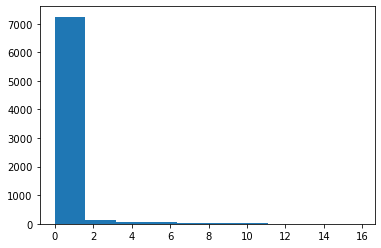

In [323]:
plt.hist(df1['LDAPS_PPT3'])

In [324]:
df1['LDAPS_PPT3'].min()

0.0

In [325]:
df1['LDAPS_PPT3'].max()

15.84123484

Most of the records are lying in the range of 0 to 2 having minimum value as 0 and maximum values as 15.84.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

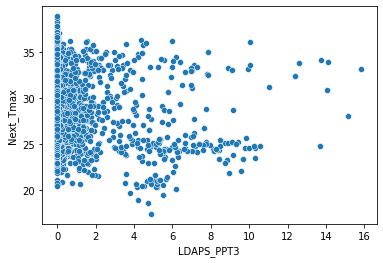

In [326]:
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmax',data=df1)

As such there is no relationship between for next-day 3rd 6-hour split average precipitation (12-17h) and the next day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

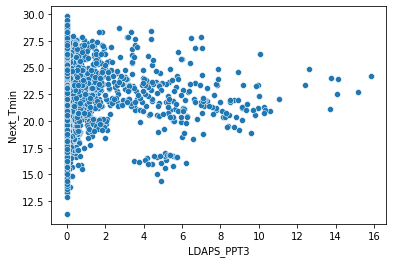

In [327]:
sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmin',data=df1)

There is a very less negative linear relationship beween next-day 3rd 6-hour split average precipitation (12-17 h) and next-day minimum air temperature.

In [328]:
df1['LDAPS_PPT4'].unique()

array([0.        , 0.84808154, 1.51387392, ..., 3.57477919, 3.34314185,
       3.09381549])

In [329]:
df1['LDAPS_PPT4'].value_counts()

0.000000    5690
0.001953       3
0.001105       2
0.000539       2
0.000046       2
            ... 
5.368769       1
0.113642       1
1.125897       1
0.391944       1
0.053507       1
Name: LDAPS_PPT4, Length: 1892, dtype: int64

There are 5690 records having 0 for next-day 4th 6-hour split average precipitation (18-23h).

(array([7.268e+03, 1.480e+02, 4.300e+01, 4.200e+01, 4.200e+01, 2.300e+01,
        8.000e+00, 1.000e+01, 3.000e+00, 1.000e+00]),
 array([ 0.        ,  1.66554692,  3.33109384,  4.99664076,  6.66218768,
         8.3277346 ,  9.99328153, 11.65882845, 13.32437537, 14.98992229,
        16.65546921]),
 <BarContainer object of 10 artists>)

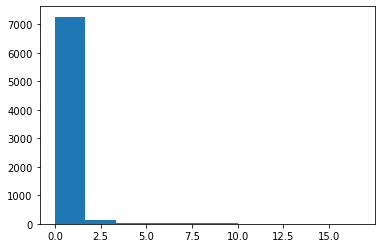

In [330]:
plt.hist(df1['LDAPS_PPT4'])

In [331]:
df1['LDAPS_PPT4'].min()

0.0

In [332]:
df1['LDAPS_PPT4'].max()

16.65546921

Most of the records are lying in the range of 0 to 1 having minimum value as 0 and maximum values as 16.65.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

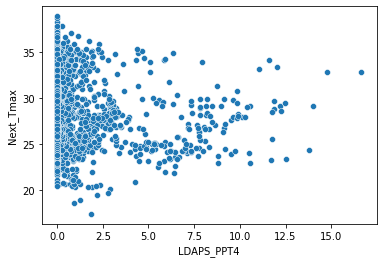

In [333]:
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',data=df1)

There is a very less negative relationship between next-day 4th 6-hour split average precipitation (18-23 h) and next-day maximum air temperature.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

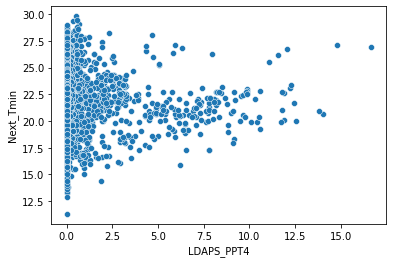

In [334]:
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmin',data=df1)

There is a very less negative relationship between next-day 4th 6-hour split average precipitation (18-23 h) and next-day minimum air temperature.

In [335]:
df1['lat'].unique()

array([37.6046, 37.5776, 37.645 , 37.5507, 37.5102, 37.4697, 37.4967,
       37.4562, 37.5372, 37.6181, 37.4832, 37.5237])

In [336]:
df1['lat'].value_counts()

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4832     307
37.4562     307
37.6450     306
Name: lat, dtype: int64

There are 1214 records i.e highest for latitude 37.5776 and the lowest records i.e 306 are for latitude 37.6450.

(array([ 911.,  307., 1208.,  609.,  608., 1204., 1214.,  610.,  611.,
         306.]),
 array([37.4562 , 37.47508, 37.49396, 37.51284, 37.53172, 37.5506 ,
        37.56948, 37.58836, 37.60724, 37.62612, 37.645  ]),
 <BarContainer object of 10 artists>)

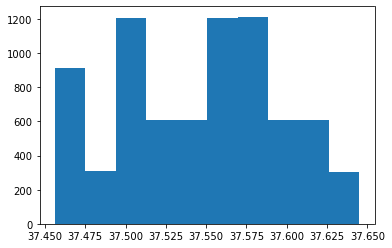

In [337]:
plt.hist(df1['lat'])

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

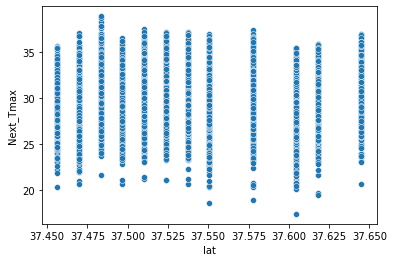

In [338]:
sns.scatterplot(x='lat',y='Next_Tmax',data=df1)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

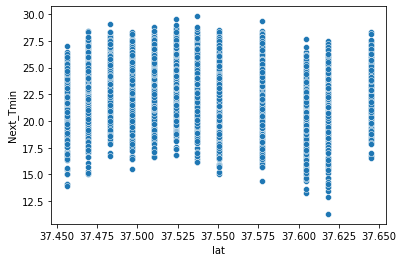

In [339]:
sns.scatterplot(x='lat',y='Next_Tmin',data=df1)

In [340]:
df1['lon'].unique()

array([126.991, 127.032, 127.058, 127.022, 127.135, 127.042, 126.838,
       126.91 , 126.826, 126.955, 127.085, 126.988, 127.083, 126.927,
       126.937, 126.995, 127.099, 127.024, 126.938, 127.004, 127.04 ,
       127.086, 126.891, 126.909, 126.97 ])

In [341]:
df1['lon'].value_counts()

127.099    307
126.955    307
127.024    307
126.970    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
126.995    304
127.040    304
127.004    304
126.927    303
126.991    303
126.826    302
126.938    302
126.937    302
126.909    302
127.086    302
126.988    302
127.042    301
126.838    301
127.085    301
126.910    300
127.135    296
Name: lon, dtype: int64

There are 307 records for longitude 127.099,126.955,127.024,126.970,126.891,127.032 i.e highest and lowest records are for longitude 127.135. 

(array([ 603.,    0.,  909.,  907.,  614., 1213., 1525.,  306., 1215.,
         296.]),
 array([126.826 , 126.8569, 126.8878, 126.9187, 126.9496, 126.9805,
        127.0114, 127.0423, 127.0732, 127.1041, 127.135 ]),
 <BarContainer object of 10 artists>)

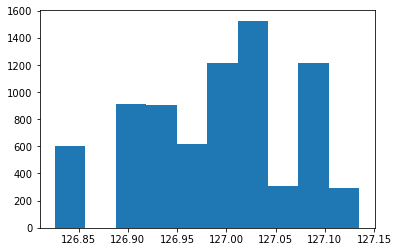

In [342]:
plt.hist(df1['lon'])

Most of the records are distributed in the range of 126.85 to 126.95 and from 127 to 127.05

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

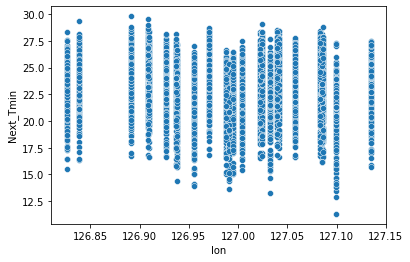

In [343]:
sns.scatterplot(x='lon',y='Next_Tmin',data=df1)

As such no relationship can be establied between lon and Next_Tmin.

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

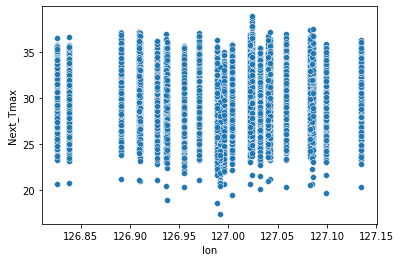

In [344]:
sns.scatterplot(x='lon',y='Next_Tmax',data=df1)

As such no relationship can be establied between lon and Next_Tmax.

In [345]:
df1['DEM'].unique()

array([212.335 ,  44.7624,  33.3068,  45.716 ,  35.038 ,  54.6384,
        12.37  ,  52.518 ,  50.9312, 208.507 ,  28.7   , 132.118 ,
        59.8324,  30.968 ,  30.0464,  82.2912,  53.4712,  56.4448,
        75.0924, 146.554 ,  26.298 ,  21.9668,  15.5876,  17.2956,
        19.5844])

In [346]:
df1['DEM'].value_counts()

53.4712     307
15.5876     307
44.7624     307
56.4448     307
19.5844     307
208.5070    307
45.7160     306
33.3068     306
59.8324     305
82.2912     304
146.5540    304
26.2980     304
212.3350    303
30.9680     303
50.9312     302
21.9668     302
132.1180    302
30.0464     302
75.0924     302
17.2956     302
28.7000     301
12.3700     301
54.6384     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64

There are 307 records for elevation 53.4712,15.5876,44.7624,56.4448,19.5844,208.5070 i.e highest and lowest records are for elevation 35.0380. 

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

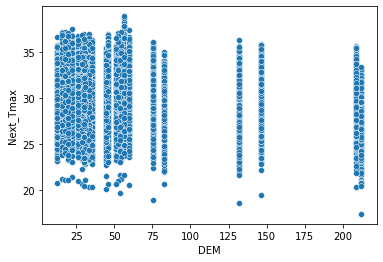

In [347]:
sns.scatterplot(x='DEM',y='Next_Tmax',data=df1)

As such there is no relationship between DEM and Next_Tmax.

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmin'>

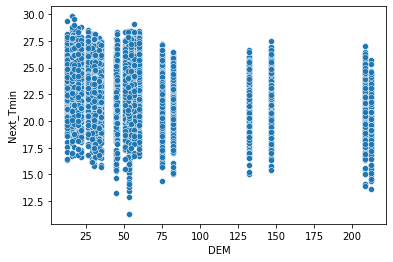

In [348]:
sns.scatterplot(x='DEM',y='Next_Tmin',data=df1)

As such there is no relationship between DEM and Next_Tmin.

In [349]:
df1['Slope'].unique()

array([2.785 , 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629,
       0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 0.618 , 0.8552, 2.2579,
       0.697 , 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223,
       0.2713])

In [350]:
df1['Slope'].value_counts()

0.6970    307
1.2313    307
0.1554    307
0.5141    307
5.1782    307
0.2713    307
2.5348    306
0.2661    306
2.6865    305
4.7296    304
0.5721    304
2.2579    304
2.7850    303
0.6180    303
0.2223    302
0.4125    302
1.7678    302
0.5931    302
0.8552    302
0.1332    302
0.1457    301
0.0985    301
0.6233    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

There are 307 records for slope 0.6970,1.2313,0.1554,0.5141,5.1782,0.2713 i.e highest and lowest records i.e 296 are for slope 0.5055

In [351]:
df1['Solar radiation'].unique()

array([5992.895996, 5869.3125  , 5863.555664, ..., 4403.272949,
       4398.263672, 4411.375977])

In [352]:
df1['Solar radiation'].value_counts()

5818.526855    5
5793.305176    5
5319.623535    5
5646.600098    5
5356.832520    5
              ..
4405.562500    1
4430.538574    1
4411.375977    1
4418.823730    1
4463.118652    1
Name: Solar radiation, Length: 1575, dtype: int64

(array([ 212.,  516.,  546.,  613.,  608.,  732.,  828., 1076., 1619.,
         838.]),
 array([4329.520508 , 4495.8580568, 4662.1956056, 4828.5331544,
        4994.8707032, 5161.208252 , 5327.5458008, 5493.8833496,
        5660.2208984, 5826.5584472, 5992.895996 ]),
 <BarContainer object of 10 artists>)

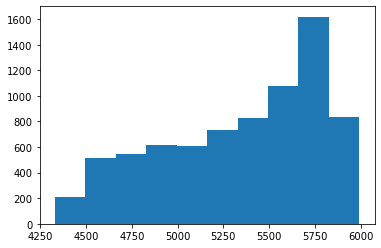

In [353]:
plt.hist(df1['Solar radiation'])

In [354]:
df1['Solar radiation'].min()

4329.520508

In [355]:
df1['Solar radiation'].max()

5992.895996

Most of the records are lying in the range 5100 to 5750  having minimum value i.e 4329 and maximum values as 5992.89

In [356]:
df1['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5, 32.8, 33.7, 33.2, 32.9,
       34.1, 34.9, 35.3, 34.6, 35. , 33.9, 33.8, 34.4, 35.6, 35.1, 34.2,
       36. , 35.5, 35.2, 34.7, 35.4, 21.6, 23.5, 24.4, 24. , 35.9, 36.1,
       22.5, 22.8, 36.2, 35.8, 21.1, 23.3, 22. , 22.7, 20.9, 22.2, 22.1,
       37. , 36.9, 22.9, 35.7, 37.1, 22.3, 22.6, 37

In [357]:
df1['Next_Tmax'].value_counts()

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
38.9      1
21.4      1
20.6      1
38.7      1
18.9      1
Name: Next_Tmax, Length: 181, dtype: int64

The higest records i.e 113 with 29.3°C as the next day maximum air temperature.

(array([   4.,   32.,  154.,  600., 1066., 1783., 1911., 1494.,  507.,
          37.]),
 array([17.4 , 19.55, 21.7 , 23.85, 26.  , 28.15, 30.3 , 32.45, 34.6 ,
        36.75, 38.9 ]),
 <BarContainer object of 10 artists>)

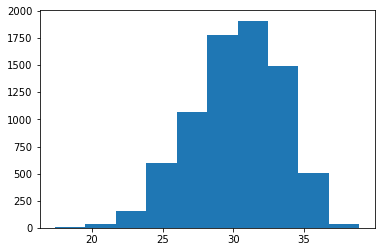

In [358]:
plt.hist(df1['Next_Tmax'])

Most of the records are in the range of 25 to 30°C for next day maximum air temperature.

In [359]:
df1['Next_Tmin'].unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
       26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6,
       28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1, 28.5,
       28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7,
       17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3, 15.4,
       15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1, 15. ,
       11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16.1, 29

In [360]:
df1['Next_Tmin'].value_counts()

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
28.5      1
29.8      1
13.9      1
13.6      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

The highest records i.e 157 with 23.5°C as the next day minimum air temperature.

(array([2.000e+00, 1.700e+01, 1.010e+02, 3.020e+02, 8.650e+02, 1.723e+03,
        2.331e+03, 1.455e+03, 7.440e+02, 4.800e+01]),
 array([11.3 , 13.15, 15.  , 16.85, 18.7 , 20.55, 22.4 , 24.25, 26.1 ,
        27.95, 29.8 ]),
 <BarContainer object of 10 artists>)

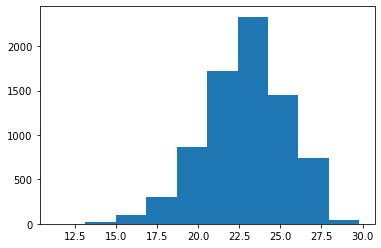

In [361]:
plt.hist(df1['Next_Tmin'])

Most of the records are in the range of 17.5 to 23°C for next day minimum air temperature.

In [362]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


The features LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_CC1,DEM,Slope are having right tailed skewness as mean is greater than median.

There is a hugh difference between 75 % and max values for feature LDAPS_LH might be due to outliers have to check for outliers.
There is a hugh difference between 75% and max value for feature DEM might be due to the outliers.

The features LDAPS_RHmax,Solar radiation are having left tailed skewness as mean is less than median.

station


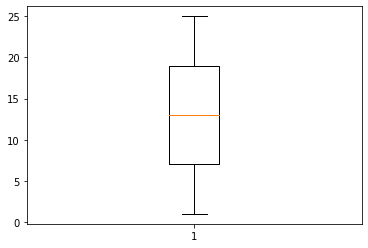

Present_Tmax


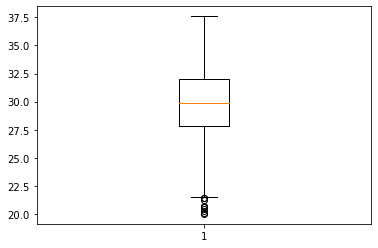

Present_Tmin


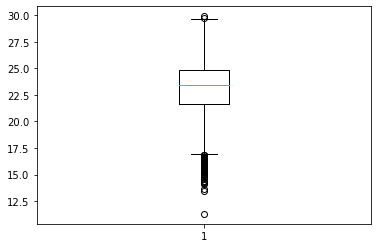

LDAPS_RHmin


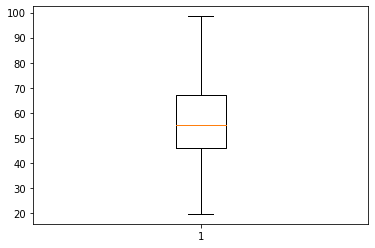

LDAPS_RHmax


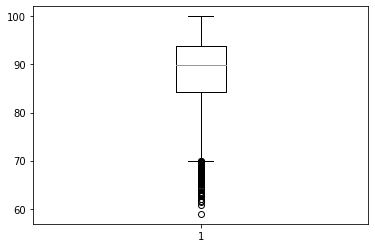

LDAPS_Tmax_lapse


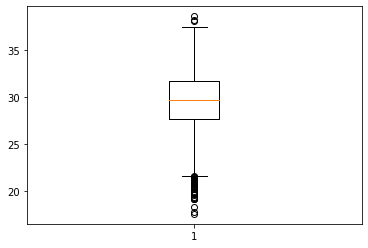

LDAPS_Tmin_lapse


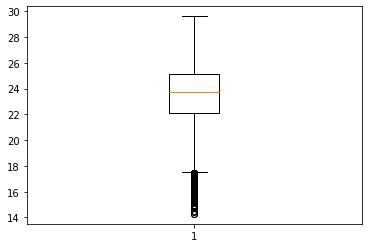

LDAPS_WS


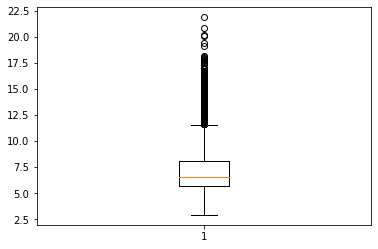

LDAPS_LH


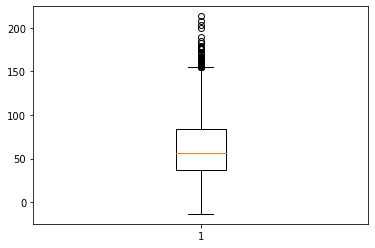

LDAPS_CC1


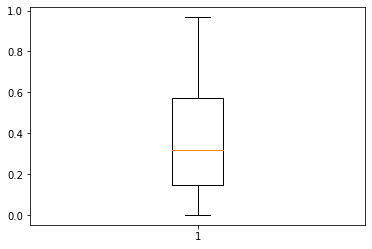

LDAPS_CC2


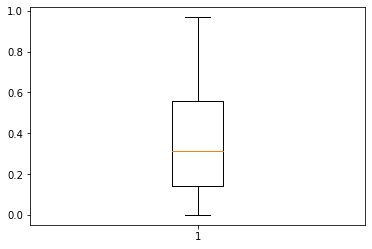

LDAPS_CC3


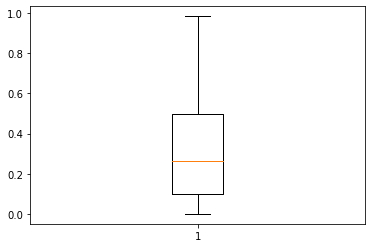

LDAPS_CC4


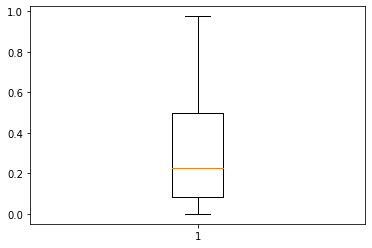

LDAPS_PPT1


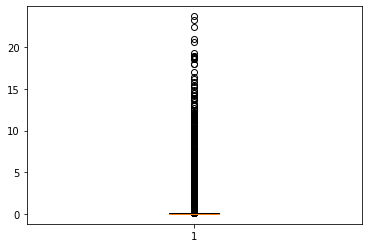

LDAPS_PPT2


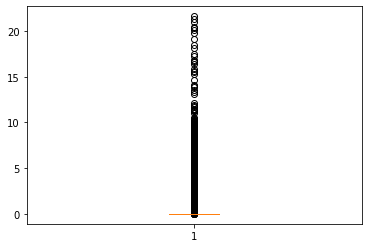

LDAPS_PPT3


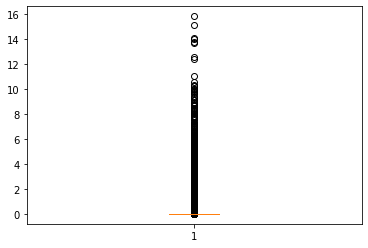

LDAPS_PPT4


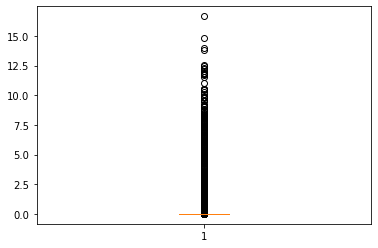

lat


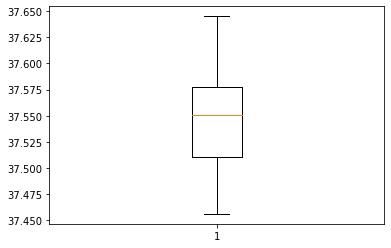

lon


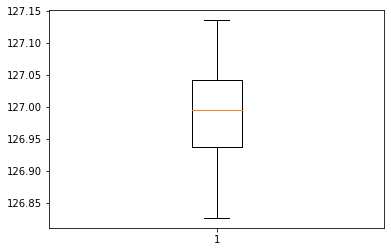

DEM


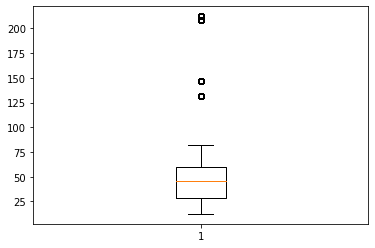

Slope


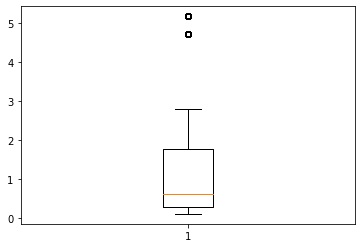

Solar radiation


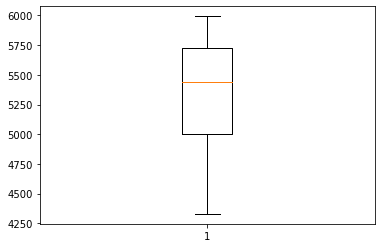

Next_Tmax


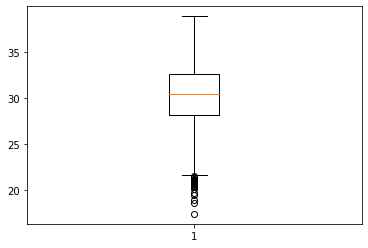

Next_Tmin


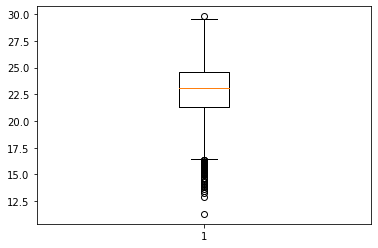

day


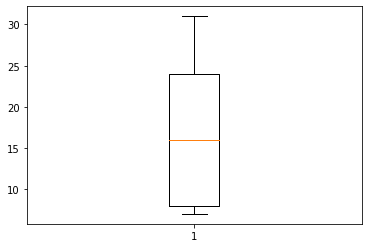

month


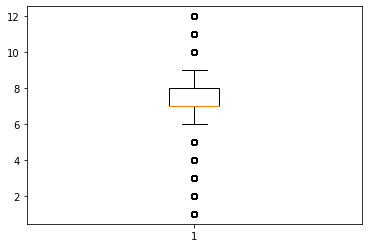

year


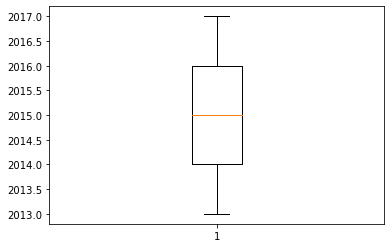

In [363]:
for i in df1.columns:
    print(i)
    plt.boxplot(df1[i])
    plt.show()
    

Present_Tmax, Present_Tmin,LDAPS_RHmin, are having outliers but they are closer to whiskers so i am not treating it.

In [364]:
df2=df1.copy()

In [365]:
from scipy.stats import zscore

In [366]:
z=np.abs(zscore(df2))

In [367]:
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

In [368]:
df2_new=df2[(z<3).all(axis=1)]

In [369]:
df2_new.shape

(6739, 27)

In [370]:
(7752-6739)/7752

0.13067595459236325

By using zscore i am getting data loss of approx 13% which is hugh.

Present_Tmax, Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH are having outliers but they are closer to whiskers so i am not treating it.

LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT3 are having outliers far away from whiskers as most of the records are having value closer to zero. The records/features can have value which is more than zero as i am not treating it keeping it as it is.

I am not treating outliers from features DEM and Slope as only few of the records are outliers.

In [371]:
df1.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
day                 0.245563
month              -0.703092
year                0.013575
dtype: float64

In [372]:
df3=df1.copy()

In [373]:
from sklearn.preprocessing import power_transform

In [374]:
df3['LDAPS_RHmax']=power_transform(df3['LDAPS_RHmax'].values.reshape(-1,1))

In [375]:
df3['LDAPS_Tmin_lapse']=power_transform(df3['LDAPS_Tmin_lapse'].values.reshape(-1,1))

In [376]:
df3['LDAPS_WS']=power_transform(df3['LDAPS_WS'].values.reshape(-1,1))

In [377]:
df3['LDAPS_LH']=power_transform(df3['LDAPS_LH'].values.reshape(-1,1))

In [378]:
df3['LDAPS_CC3']=power_transform(df3['LDAPS_CC3'].values.reshape(-1,1))

In [379]:
df3['LDAPS_CC4']=power_transform(df3['LDAPS_CC4'].values.reshape(-1,1))

In [380]:
df3['LDAPS_PPT1']=power_transform(df3['LDAPS_PPT1'].values.reshape(-1,1))

In [381]:
df3['LDAPS_PPT2']=power_transform(df3['LDAPS_PPT2'].values.reshape(-1,1))

In [382]:
df3['LDAPS_PPT3']=power_transform(df3['LDAPS_PPT3'].values.reshape(-1,1))

In [383]:
df3['LDAPS_PPT4']=power_transform(df3['LDAPS_PPT4'].values.reshape(-1,1))

In [384]:
df3['DEM']=power_transform(df3['DEM'].values.reshape(-1,1))

In [385]:
df3['Slope']=power_transform(df3['Slope'].values.reshape(-1,1))

In [386]:
df3.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
day                 0.245563
month              -0.703092
year                0.013575
dtype: float64

Eventhough there is a skewness in LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 I am keeping as it is as chances are if i apply skewness again the value will become zero.

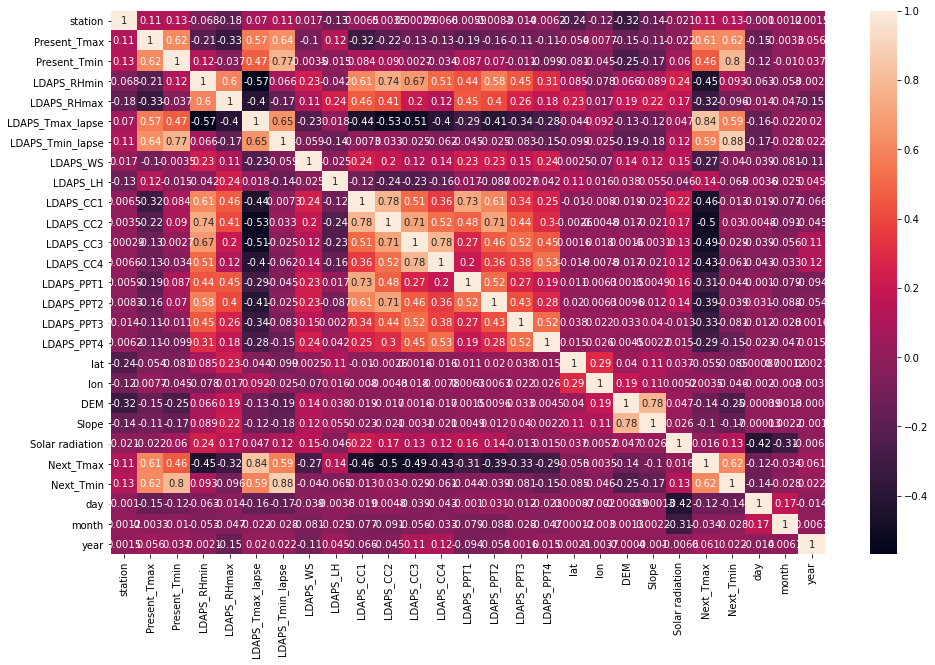

In [387]:
plt.figure(figsize=[16,10])
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [388]:
corr=df3.corr()
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592662
Present_Tmin        0.463523
LDAPS_LH            0.136835
station             0.107747
year                0.061211
Solar radiation     0.016145
lon                 0.003502
month              -0.033684
lat                -0.055367
Slope              -0.103185
day                -0.122303
DEM                -0.139132
LDAPS_WS           -0.270957
LDAPS_PPT4         -0.289131
LDAPS_PPT1         -0.312036
LDAPS_RHmax        -0.320924
LDAPS_PPT3         -0.325336
LDAPS_PPT2         -0.386020
LDAPS_CC4          -0.432093
LDAPS_RHmin        -0.446824
LDAPS_CC1          -0.459705
LDAPS_CC3          -0.490158
LDAPS_CC2          -0.498295
Name: Next_Tmax, dtype: float64

Features named as Solar radiation ,lon,lat are having very less relation with the target variable but i am not removing it as it should be the last option to remove it.

In [389]:
corr1=df3.corr()
corr1['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.881094
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
year                0.021617
LDAPS_CC1          -0.012877
month              -0.028344
LDAPS_CC3          -0.028579
LDAPS_PPT2         -0.039455
LDAPS_WS           -0.039561
LDAPS_PPT1         -0.043780
lon                -0.045758
LDAPS_CC4          -0.061211
LDAPS_LH           -0.064952
LDAPS_PPT3         -0.081366
lat                -0.085136
LDAPS_RHmax        -0.096277
day                -0.135865
LDAPS_PPT4         -0.154711
Slope              -0.169666
DEM                -0.248936
Name: Next_Tmin, dtype: float64

Features named as LDAPS_RHmin,LDAPS_CC2,LDAPS_CC1,LDAPS_CC3,LDAPS_PPT2,LDAPS_WS LDAPS_PPT1,lon,LDAPS_CC4,LDAPS_LH,LDAPS_PPT3,lat,LDAPS_RHmax are having very less relation with the target variable but i am not removing it as it should be the last option to remove it.

In [405]:
x=df3.drop(['Next_Tmin','Next_Tmax'],axis=1)
y1=df3[['Next_Tmax']]

# As i am having two target variables I will create two independent models for each target variable and try to find the best model.

In [406]:
from sklearn.preprocessing import StandardScaler

In [407]:
se=StandardScaler()
x=se.fit_transform(x)

In [453]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.25,random_state=50)

In [454]:
lr1=LinearRegression()
lr1.fit(x_train,y1_train)
pred=lr1.predict(x_test)
print(mean_squared_error(y1_test,pred))
print(mean_absolute_error(y1_test,pred))
print(np.sqrt(mean_absolute_error(y1_test,pred)))
print(r2_score(y1_test,pred))

2.180264466784866
1.1113232541972267
1.054193176888006
0.7805152646703832


In [455]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y1_train)
pred1=dtr.predict(x_test)
print(mean_squared_error(y1_test,pred1))
print(mean_absolute_error(y1_test,pred1))
print(np.sqrt(mean_absolute_error(y1_test,pred1)))
print(r2_score(y1_test,pred1))


2.134106483921982
1.021507643647865
1.0106966130584711
0.7851619361207275


In [456]:
knr=KNeighborsRegressor()
knr.fit(x_train,y1_train)
pred2=knr.predict(x_test)
print(mean_squared_error(y1_test,pred2))
print(mean_absolute_error(y1_test,pred2))
print(np.sqrt(mean_absolute_error(y1_test,pred2)))
print(r2_score(y1_test,pred2))


1.1229397996837107
0.8016657880864522
0.8953579106069551
0.8869549320830206


In [457]:
svr=SVR()
svr.fit(x_train,y1_train)
pred3=svr.predict(x_test)
print(mean_squared_error(y1_test,pred3))
print(mean_absolute_error(y1_test,pred3))
print(np.sqrt(mean_absolute_error(y1_test,pred3)))
print(r2_score(y1_test,pred3))

1.060247565752436
0.7550845232821579
0.8689559961713584
0.8932660877163183


In [459]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y1_train)
pred4=rfr.predict(x_test)
print(mean_squared_error(y1_test,pred4))
print(mean_absolute_error(y1_test,pred4))
print(np.sqrt(mean_absolute_error(y1_test,pred4)))
print(r2_score(y1_test,pred4))

0.8879644949920922
0.701065366367949
0.8372964626510427
0.910609627806833


In [460]:
ada=AdaBoostRegressor()
ada.fit(x_train,y1_train)
pred5=ada.predict(x_test)
print(mean_squared_error(y1_test,pred5))
print(mean_absolute_error(y1_test,pred5))
print(np.sqrt(mean_absolute_error(y1_test,pred5)))
print(r2_score(y1_test,pred5))


2.1647487936221803
1.1791346400604432
1.0858796618688662
0.7820772097781686


In [461]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y1_train)
pred6=ada.predict(x_test)
print(mean_squared_error(y1_test,pred6))
print(mean_absolute_error(y1_test,pred6))
print(np.sqrt(mean_absolute_error(y1_test,pred6)))
print(r2_score(y1_test,pred6))


2.1647487936221803
1.1791346400604432
1.0858796618688662
0.7820772097781686


In [462]:
from sklearn.linear_model import Lasso,Ridge

In [463]:
ls=Lasso()
ls.fit(x_train,y1_train)
pred7=ls.predict(x_test)
print(mean_squared_error(y1_test,pred7))
print(mean_absolute_error(y1_test,pred7))
print(np.sqrt(mean_absolute_error(y1_test,pred7)))
print(r2_score(y1_test,pred7))



4.064016698474323
1.6105561815622536
1.2690769013587213
0.5908800776104217


In [464]:
rd=Ridge()
rd.fit(x_train,y1_train)
pred8=rd.predict(x_test)
print(mean_squared_error(y1_test,pred8))
print(mean_absolute_error(y1_test,pred8))
print(np.sqrt(mean_absolute_error(y1_test,pred8)))
print(r2_score(y1_test,pred8))

2.1804121040461575
1.1113416256546067
1.0542018903675932
0.7805004021958014


# Checking out cross_val_score for all the models

In [465]:
from sklearn.model_selection import cross_val_score

In [466]:
score=cross_val_score(lr,x,y1,cv=5)
print(score.mean())

0.6812933301980371


In [467]:
score1=cross_val_score(dtr,x,y1,cv=5)
print(score1.mean())

0.4514589486392824


In [468]:
score2=cross_val_score(knr,x,y1,cv=5)
print(score2.mean())

0.5051034120856689


In [469]:
score3=cross_val_score(svr,x,y1,cv=5)
print(score3.mean())

0.6700250549184061


In [470]:
score4=cross_val_score(rfr,x,y1,cv=5)
print(score4.mean())

0.6979327265878801


In [471]:
score5=cross_val_score(ada,x,y1,cv=5)
print(score5.mean())

0.6793706738059999


In [472]:
score6=cross_val_score(gr,x,y1,cv=5)
print(score6.mean())

0.7142788313234374


In [473]:
score7=cross_val_score(ls,x,y1,cv=5)
print(score7.mean())

0.5548496266355715


In [474]:
score8=cross_val_score(rd,x,y1,cv=5)
print(score8.mean())

0.6813497125089178


# Lasso is my best model for prediction of Next_Tmax feature as the difference between r2_score and cross_val_Score is minimum.

Hypertuning of lasso parameters

In [478]:
from sklearn.model_selection import RandomizedSearchCV

In [479]:
params1={'alpha':[0.1,0.2,0.3,0.5,1],'fit_intercept':['True','False'],'random_state':np.arange(1,100),'selection':['cyclic','random']}

In [480]:
RandomizedSearchCV?

In [481]:
re=RandomizedSearchCV(ls,param_distributions=params1,n_jobs=-1,cv=5)
re.fit(x_train,y1_train)
re.best_params_

{'selection': 'cyclic',
 'random_state': 53,
 'fit_intercept': 'False',
 'alpha': 0.1}

In [484]:
ls=Lasso(alpha=0.1,fit_intercept='False',random_state=53,selection='cyclic')
ls.fit(x_train,y1_train)
pred9=ls.predict(x_test)
print(mean_absolute_error(y1_test,pred9))
print(mean_squared_error(y1_test,pred9))
print(np.sqrt(mean_squared_error(y1_test,pred9)))
print(r2_score(y1_test,pred9))

1.1526768237233176
2.332094773388882
1.5271197639310683
0.7652306810028161


# With Lasso i am getting r2 score of 76% for predicting target variable Next_Tmax

Text(0.5, 1.0, 'Lasso Regression')

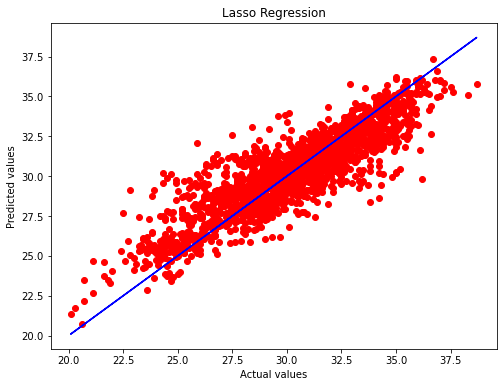

In [485]:
plt.figure(figsize=(8,6))
plt.scatter(x=y1_test,y=pred9,color='r')
plt.plot(y1_test,y1_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Lasso Regression")

In [486]:
import joblib

In [487]:
joblib.dump(ls,'next_tmax.obj')

['next_tmax.obj']

In [488]:
joblib.load('next_tmax.obj')

Lasso(alpha=0.1, fit_intercept='False', random_state=53)

In [489]:
x1=df3.drop(['Next_Tmin','Next_Tmax'],axis=1)
y=df3[['Next_Tmin']]

In [490]:
se=StandardScaler()
x1=se.fit_transform(x1)

In [491]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=42)

In [492]:
lr1=LinearRegression()
lr1.fit(x1_train,y_train)
pred10=lr1.predict(x1_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))

0.7811559010662783
1.0241002176307192
1.0119783681634302
0.8348446024595401


In [493]:
dtr1=DecisionTreeRegressor()
dtr1.fit(x1_train,y_train)
pred11=dtr1.predict(x1_test)
print(mean_absolute_error(y_test,pred11))
print(mean_squared_error(y_test,pred11))
print(np.sqrt(mean_squared_error(y_test,pred11)))
print(r2_score(y_test,pred11))

0.8326304691618345
1.2552293094359515
1.1203701662557566
0.79757069470804


In [494]:
knr1=KNeighborsRegressor()
knr1.fit(x1_train,y_train)
pred12=knr1.predict(x1_test)
print(mean_absolute_error(y_test,pred12))
print(mean_squared_error(y_test,pred12))
print(np.sqrt(mean_squared_error(y_test,pred12)))
print(r2_score(y_test,pred12))

0.6631839746968898
0.7655074327886137
0.8749328161571114
0.8765475466113327


In [495]:
svr1=SVR()
svr1.fit(x1_train,y_train)
pred13=svr1.predict(x1_test)
print(mean_absolute_error(y_test,pred13))
print(mean_squared_error(y_test,pred13))
print(np.sqrt(mean_squared_error(y_test,pred13)))
print(r2_score(y_test,pred13))

0.5369492188990532
0.5015599228428549
0.708208954223861
0.9191140407731622


In [496]:
rfr1=RandomForestRegressor()
rfr1.fit(x1_train,y_train)
pred14=rfr1.predict(x1_test)
print(mean_absolute_error(y_test,pred14))
print(mean_squared_error(y_test,pred14))
print(np.sqrt(mean_squared_error(y_test,pred14)))
print(r2_score(y_test,pred14))

0.5794238270954137
0.5882280922509225
0.7669602937903125
0.9051371704178287


In [497]:
ada1=AdaBoostRegressor()
ada1.fit(x1_train,y_train)
pred15=ada1.predict(x1_test)
print(mean_absolute_error(y_test,pred15))
print(mean_squared_error(y_test,pred15))
print(np.sqrt(mean_squared_error(y_test,pred15)))
print(r2_score(y_test,pred15))

0.8853774365338006
1.1834282036290822
1.0878548633108565
0.8091499717838838


In [498]:
gr1=GradientBoostingRegressor()
gr1.fit(x1_train,y_train)
pred16=gr1.predict(x1_test)
print(mean_absolute_error(y_test,pred16))
print(mean_squared_error(y_test,pred16))
print(np.sqrt(mean_squared_error(y_test,pred16)))
print(r2_score(y_test,pred16))

0.6445326494342225
0.6810697387592194
0.8252694946253735
0.8901647109129742


In [499]:
ls1=Lasso()
ls1.fit(x1_train,y_train)
pred17=ls1.predict(x1_test)
print(mean_absolute_error(y_test,pred17))
print(mean_squared_error(y_test,pred17))
print(np.sqrt(mean_squared_error(y_test,pred17)))
print(r2_score(y_test,pred17))

1.2058486647214686
2.3386374193862944
1.5292604158174938
0.6228507854482142


In [500]:
rd1=Ridge()
rd1.fit(x1_train,y_train)
pred18=rd1.predict(x1_test)
print(mean_absolute_error(y_test,pred18))
print(mean_squared_error(y_test,pred18))
print(np.sqrt(mean_squared_error(y_test,pred18)))
print(r2_score(y_test,pred18))

0.7811719594217368
1.0241253873387948
1.0119908039793617
0.8348405433713066


# Checking out cross_val_score for all the models

In [501]:
score9=cross_val_score(lr1,x,y,cv=5)
print(score9.mean())

0.7725660129089997


In [502]:
score10=cross_val_score(dtr1,x,y,cv=5)
print(score10.mean())

0.5656742902820726


In [503]:
score11=cross_val_score(knr1,x,y,cv=5)
print(score11.mean())

0.5407028880392392


In [504]:
score12=cross_val_score(svr1,x,y,cv=5)
print(score12.mean())

0.7202865537243786


In [505]:
score13=cross_val_score(rfr1,x,y,cv=5)
print(score13.mean())

0.780361196444822


In [506]:
score14=cross_val_score(ada1,x,y,cv=5)
print(score14.mean())

0.7455664224613268


In [507]:
score15=cross_val_score(gr1,x,y,cv=5)
print(score15.mean())

0.7967450216075636


In [508]:
score16=cross_val_score(ls1,x,y,cv=5)
print(score16.mean())

0.5620553138261319


In [509]:
score17=cross_val_score(rd1,x,y,cv=5)
print(score17.mean())

0.7725956750351435


# Linear regression,Lasso,Ridge,AdaboostRegressor is my best model for predicting Next_Tmin target.

Will do hypertuning to find the best model.

In [515]:
params2={'fit_intercept':['True','False']}

In [516]:
rs1=RandomizedSearchCV(lr1,param_distributions=params2,n_jobs=-1,cv=5)
rs1.fit(x1_train,y_train)
rs1.best_params_

{'fit_intercept': 'True'}

In [517]:
lr1=LinearRegression(fit_intercept='True')
lr1.fit(x1_train,y_train)
pred19=lr1.predict(x1_test)
print(mean_absolute_error(y_test,pred19))
print(mean_squared_error(y_test,pred19))
print(np.sqrt(mean_squared_error(y_test,pred19)))
print(r2_score(y_test,pred19))


0.7811559010662783
1.0241002176307192
1.0119783681634302
0.8348446024595401


In [522]:
params3={'alpha':[0.1,0.2,0.3,0.5,1],'fit_intercept':['True','False'],'random_state':np.arange(1,100),'selection':['cyclic','random']}

In [523]:
rs2=RandomizedSearchCV(ls1,param_distributions=params3,n_jobs=-1,cv=5)
rs2.fit(x1_train,y_train)
rs2.best_params_

{'selection': 'random',
 'random_state': 82,
 'fit_intercept': 'False',
 'alpha': 0.1}

In [526]:
ls1=Lasso(alpha=0.1,fit_intercept='False',random_state=82,selection='random')
ls1.fit(x1_train,y_train)
pred20=ls1.predict(x1_test)
print(mean_absolute_error(y_test,pred20))
print(mean_squared_error(y_test,pred20))
print(np.sqrt(mean_squared_error(y_test,pred20)))
print(r2_score(y_test,pred20))

0.8434712011807732
1.1733519416407867
1.0832137100502313
0.8107749583093714


In [528]:
params4={'alpha':[0.1,0.2,0.3,0.5,1],'fit_intercept':['True','False'],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],'random_state':np.arange(1,100)}

In [531]:
rs3=RandomizedSearchCV(rd1,param_distributions=params4,n_jobs=-1,cv=5)
rs3.fit(x1_train,y_train)
rs3.best_params_

{'solver': 'saga', 'random_state': 99, 'fit_intercept': 'False', 'alpha': 0.5}

In [533]:
rd1=Ridge(alpha=0.5,fit_intercept='False',solver='saga',random_state=99)
rd1.fit(x1_train,y_train)
pred21=rd1.predict(x1_test)
print(mean_absolute_error(y_test,pred21))
print(mean_squared_error(y_test,pred21))
print(np.sqrt(mean_squared_error(y_test,pred21)))
print(r2_score(y_test,pred21))



0.7811379110501738
1.0241215417984895
1.0119889039898062
0.8348411635369184


In [535]:
params5={'n_estimators':[20,40,50,80,100],'learning_rate':[0.1,0.2,0.3,0.5,1],'random_state':np.arange(1,100)}

In [537]:
rs4=RandomizedSearchCV(ada1,param_distributions=params5,n_jobs=-1,cv=5)
rs4.fit(x1_train,y_train)
rs4.best_params_

{'random_state': 23, 'n_estimators': 50, 'learning_rate': 1}

In [538]:
ada1=AdaBoostRegressor(n_estimators=50,learning_rate=1,random_state=23)
ada1.fit(x1_train,y_train)
pred22=ada1.predict(x1_test)
print(mean_absolute_error(y_test,pred22))
print(mean_squared_error(y_test,pred22))
print(np.sqrt(mean_squared_error(y_test,pred22)))
print(r2_score(y_test,pred22))



0.887791075410361
1.2011263571973048
1.0959591037978127
0.806295812065947


# Linear Regression is my best model with r2_score of 83% for predicting Next_Tmin.

Text(0.5, 1.0, 'Linear Regression')

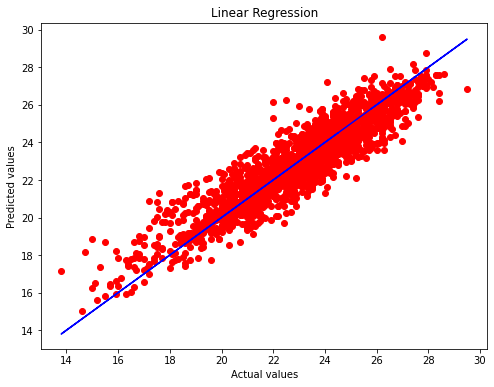

In [539]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred19,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression")

In [519]:
import joblib

In [520]:
joblib.dump(lr1,'next_tmin.obj')

['next_tmin.obj']

In [521]:
joblib.load('next_tmin.obj')

LinearRegression(fit_intercept='True')